In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Homework 2
## Analysing Mutual Fund Peformance by size

## Team Members

- Brett Bartol _(bjb3972)_
- Rohitashwa Chakraborty _(rc47878)_
- MC Kreps _(mck678)_

## Variable Description

- dret	double	Return per Share (dret)
- dnav	double	Net Asset Value per Share (dnav)

# Assumptions
- Considering funds for the period _2010-2020_ **only**
- Working with only SMALL-CAP Funds
- _R_ in dret implies 0 returns

# Fetching Fund Data

In [17]:
complete_df = pd.read_csv("daily-mf-data.csv", low_memory = False)
print(complete_df.shape)
complete_df["caldt"] = pd.to_datetime(complete_df["caldt"])
complete_df["dret"] = complete_df["dret"].replace('R', '0.0').astype("float")
mf_id = complete_df.crsp_fundno.unique()
print(len(mf_id), mf_id[:10])
complete_df["yr"] = complete_df["caldt"].apply(lambda x: x.strftime("%m-%Y"))
complete_df.head()

(53056812, 4)
43902 [ 105 2704 2706 2708 2711 2724 2725 2727 2729 2731]


,crsp_fundno,caldt,dnav,dret,yr
0,105,2015-02-01,12.98,-0.003837,02-2015
1,105,2015-05-01,12.75,-0.017720,05-2015
2,105,2015-06-01,12.61,-0.010980,06-2015
3,105,2015-07-01,12.75,0.011102,07-2015
4,105,2015-08-01,12.96,0.016471,08-2015


In [22]:
# with open('./data/mf_code.txt', 'w') as f:
#     for item in mf_id:
#         f.write("%s\n" % item)

# Fetching Fund Summary

In [18]:
mf_summary = pd.read_csv("./mf_summary.csv")
mf_summary["caldt"] = pd.to_datetime(mf_summary["caldt"])
mf_summary = mf_summary.rename({'caldt':'nav_date'}, axis= 1)

print(mf_summary.shape)
mf_summary.head()

(329042, 9)


,crsp_fundno,summary_period2,nav_date,nav_latest,crsp_cl_grp,fund_name,ticker,dead_flag,lipper_obj_name
0,105,AQ,2010-12-31,9.06,2000026.0,American Pension Investors Trust: API Efficien...,APITX,N,GLOBAL FUNDS
1,105,AQ,2011-12-30,8.49,2000026.0,American Pension Investors Trust: API Efficien...,APITX,N,GLOBAL FUNDS
2,105,AQ,2012-12-31,9.85,2000026.0,American Pension Investors Trust: API Efficien...,APITX,N,GLOBAL FUNDS
3,105,AQ,2013-12-31,13.13,2000026.0,American Pension Investors Trust: API Efficien...,APITX,N,GLOBAL FUNDS
4,105,AQ,2014-12-31,13.03,2000026.0,American Pension Investors Trust: API Efficien...,APITX,N,GLOBAL FUNDS


## Extracting Only SMALL CAP Mutual Funds

Removing Nan Values

In [35]:
# mf_summary.isna().sum()

crsp_fundno            0
summary_period2        0
caldt                  0
nav_latest             0
crsp_cl_grp         1521
fund_name           1469
ticker             41265
dead_flag           1469
lipper_obj_name     1164
dtype: int64

Find crsp_fundno corresponding to Nan Values.

Since these have incomplete data, they will have to be dropped

In [19]:
incomplete_policy = mf_summary[mf_summary["lipper_obj_name"].isna()]["crsp_fundno"].unique()
print(len(incomplete_policy))
incomplete_policy[0:10]

724


array([38201, 38245, 38274, 38582, 38774, 40090, 40346, 40356, 40358,
       40484])

In [20]:
mf_summary.drop(mf_summary[mf_summary["lipper_obj_name"].isna()].index, inplace= True)
mf_summary.reset_index(inplace=True, drop= True)
mf_summary.isna().sum()

crsp_fundno            0
summary_period2        0
nav_date               0
nav_latest             0
crsp_cl_grp         1511
fund_name           1459
ticker             40673
dead_flag           1459
lipper_obj_name        0
dtype: int64

In [22]:
search = "small-cap".upper()
small_cap_summary = mf_summary[mf_summary["lipper_obj_name"].str.match(search)][["crsp_fundno","nav_date","nav_latest","fund_name","ticker","dead_flag"]].reset_index(drop=True).copy()
small_cap_summary["dead_flag"] = small_cap_summary["dead_flag"].str.replace("N","0")
small_cap_summary["dead_flag"] = small_cap_summary["dead_flag"].str.replace("Y","1")
small_cap_summary["dead_flag"] = small_cap_summary["dead_flag"].astype("bool")
small_cap_summary["yr"] = small_cap_summary["nav_date"].apply(lambda x: x.strftime("%m-%Y"))

small_cap_summary.head(2)

,crsp_fundno,nav_date,nav_latest,fund_name,ticker,dead_flag,yr
0,2727,2010-12-31,14.46,GuideStone Funds: Small Cap Equity Fund; GS4 C...,GSCZX,True,12-2010
1,2727,2011-12-30,14.62,GuideStone Funds: Small Cap Equity Fund; GS4 C...,GSCZX,True,12-2011


In [23]:
complete_df = complete_df.merge(small_cap_summary, how="inner",on=["crsp_fundno","yr"])
complete_df.drop(["yr"],axis = 1, inplace= True)
complete_df.to_csv("./data/small_cap.csv", index= False)
complete_df.head(7)

,crsp_fundno,caldt,dnav,dret,nav_date,nav_latest,fund_name,ticker,dead_flag
0,2727,2015-12-01,16.64,-0.006567,2015-12-31,15.17,GuideStone Funds: Small Cap Equity Fund; Inves...,GSCZX,True
1,2727,2015-12-02,17.32,0.011092,2015-12-31,15.17,GuideStone Funds: Small Cap Equity Fund; Inves...,GSCZX,True
2,2727,2015-12-03,17.51,0.016841,2015-12-31,15.17,GuideStone Funds: Small Cap Equity Fund; Inves...,GSCZX,True
3,2727,2015-12-05,17.70,-0.003378,2015-12-31,15.17,GuideStone Funds: Small Cap Equity Fund; Inves...,GSCZX,True
4,2727,2015-12-06,18.09,-0.001104,2015-12-31,15.17,GuideStone Funds: Small Cap Equity Fund; Inves...,GSCZX,True
5,2727,2015-12-08,17.32,-0.002879,2015-12-31,15.17,GuideStone Funds: Small Cap Equity Fund; Inves...,GSCZX,True
6,2727,2015-12-10,16.72,-0.001791,2015-12-31,15.17,GuideStone Funds: Small Cap Equity Fund; Inves...,GSCZX,True


In [62]:
# with open('./data/small_cap_mfID.txt', 'w') as f:
#     for item in small_cap.crsp_fundno.unique():
#         f.write("%s\n" % item)

# Analysing Small Cap Data

In [32]:
small_cap = pd.read_csv("./data/small_cap.csv")
print(small_cap.shape)
small_cap["caldt"] = pd.to_datetime(small_cap["caldt"])
small_cap["nav_date"] = pd.to_datetime(small_cap["nav_date"])
# small_cap.sort_values(by=["nav_date","caldt","crsp_fundno"],inplace= True, ascending=True, ignore_index= True)
small_cap.head()

(217070, 9)


,crsp_fundno,caldt,dnav,dret,nav_date,nav_latest,fund_name,ticker,dead_flag
0,2727,2015-12-01,16.64,-0.006567,2015-12-31,15.17,GuideStone Funds: Small Cap Equity Fund; Inves...,GSCZX,True
1,2727,2015-12-02,17.32,0.011092,2015-12-31,15.17,GuideStone Funds: Small Cap Equity Fund; Inves...,GSCZX,True
2,2727,2015-12-03,17.51,0.016841,2015-12-31,15.17,GuideStone Funds: Small Cap Equity Fund; Inves...,GSCZX,True
3,2727,2015-12-05,17.70,-0.003378,2015-12-31,15.17,GuideStone Funds: Small Cap Equity Fund; Inves...,GSCZX,True
4,2727,2015-12-06,18.09,-0.001104,2015-12-31,15.17,GuideStone Funds: Small Cap Equity Fund; Inves...,GSCZX,True


In [25]:
# small_cap.set_index(["nav_date","crsp_fundno","caldt"], inplace=True)
# small_cap

dnav      dret  nav_latest  \
nav_date   crsp_fundno caldt                                     
2015-12-31 2727        2015-12-01  16.64 -0.006567       15.17   
                       2015-12-02  17.32  0.011092       15.17   
                       2015-12-03  17.51  0.016841       15.17   
                       2015-12-05  17.70 -0.003378       15.17   
                       2015-12-06  18.09 -0.001104       15.17   
...                                  ...       ...         ...   
2020-12-31 97865       2020-12-24  30.24  0.000331       30.32   
                       2020-12-28  30.44  0.006614       30.32   
                       2020-12-29  30.05 -0.012812       30.32   
                       2020-12-30  30.26  0.006988       30.32   
                       2020-12-31  30.32  0.001983       30.32   

                                                                           fund_name  \
nav_date   crsp_fundno caldt                                                           
2015-12-31 2727        2015-12-01  GuideStone Funds: Small Cap Equity Fund; Inves...   
                       2015-12-02  GuideStone Funds: Small Cap Equity Fund; Inves...   
                       2015-12-03  GuideStone Funds: Small Cap Equity Fund; Inves...   
                       2015-12-05  GuideStone Funds: Small Cap Equity Fund; Inves...   
                       2015-12-06  GuideStone Funds: Small Cap Equity Fund; Inves...   
...                                                                              ...   
2020-12-31 97865       2020-12-24  Bragg Capital Trust: FPA Queens Road Small Cap...   
                       2020-12-28  Bragg Capital Trust: FPA Queens Road Small Cap...   
                       2020-12-29  Bragg Capital Trust: FPA Queens Road Small Cap...   
                       2020-12-30  Bragg Capital Trust: FPA Queens Road Small Cap...   
                       2020-12-31  Bragg Capital Trust: FPA Queens Road Small Cap...   

                                  ticker  dead_flag  
nav_date   crsp_fundno caldt                         
2015-12-31 2727        2015-12-01  GSCZX       True  
                       2015-12-02  GSCZX       True  
                       2015-12-03  GSCZX       True  
                       2015-12-05  GSCZX       True  
                       2015-12-06  GSCZX       True  
...                                  ...        ...  
2020-12-31 97865       2020-12-24  QRSIX       True  
                       2020-12-28  QRSIX       True  
                       2020-12-29  QRSIX       True  
                       2020-12-30  QRSIX       True  
                       2020-12-31  QRSIX       True  

[217070 rows x 6 columns]

In [84]:
from scipy.stats.mstats import gmean

def get_gmean(series):
    return gmean(series+1)-1

small_cap_monthly = small_cap.groupby(["nav_date","crsp_fundno"])["dret","nav_latest"].agg({"nav_latest":"mean",
                                                                        "dret": get_gmean})
small_cap_monthly

/var/folders/y3/v6fyb_rs72bcn7ftc3lvwvmw0000gn/T/ipykernel_9240/824551998.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  small_cap_monthly = small_cap.groupby(["nav_date","crsp_fundno"])["dret","nav_latest"].agg({"nav_latest":"mean",


nav_latest      dret
nav_date   crsp_fundno                      
2015-12-31 2727              15.17  0.000131
           2745              11.04  0.000491
           2747               6.47  0.000293
           2754               5.79  0.000289
           2808              11.15  0.000449
...                            ...       ...
2020-12-31 97782             24.22  0.000245
           97783             18.04  0.002918
           97818             57.51  0.003071
           97864             30.32  0.001798
           97865             30.32  0.001824

[10437 rows x 2 columns]

(array([2.583e+03, 4.940e+03, 1.495e+03, 5.860e+02, 3.750e+02, 1.490e+02,
        7.800e+01, 4.100e+01, 3.200e+01, 2.800e+01, 2.700e+01, 1.700e+01,
        1.000e+01, 7.000e+00, 1.100e+01, 8.000e+00, 6.000e+00, 1.100e+01,
        6.000e+00, 9.000e+00, 6.000e+00, 5.000e+00, 4.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.98000000e-02, 1.32668067e+01, 2.65038133e+01, 3.97408200e+01,
        5.29778267e+01, 6.62148333e+01, 7.94518400e+01, 9.26888467e+01,
        1.05925853e+02, 1.19162860e+02, 1.32399867e+02, 1.45636873e+02,
        1.58873880e+02, 1.72110887e+02, 1.85347893e+02, 1.98584900e+02,
        2.11821907e+02, 2.25058913e+02, 2.38295920e+02, 2.51532927e+02,
        2.64769933e+02, 2.78006940e+02, 2.91243947e+02, 3.04480953e+02,
        3.17717960e+02, 3.30954967e+02, 3.44191973e+02, 3.57428980e+02,
        3.70665987e+02, 3.83902993e+02, 3.97140000e+02]),
 <BarContainer object of 30 artists>)

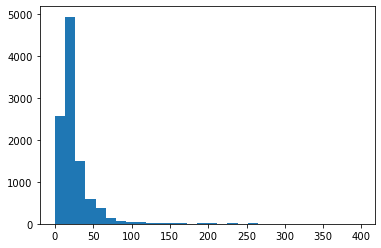

In [85]:
plt.hist(list(small_cap_monthly["nav_latest"]), bins = 30)

Dividing small caps into 3 buckets of size based on nav

- < 50
- 50 - 150
- \>150

In [86]:
bins = [0, 50, 150, np.inf]
small_cap_monthly["size"] = pd.cut(small_cap_monthly['nav_latest'], bins, labels=["Small","Mid","Large"])
small_cap_monthly

nav_latest      dret   size
nav_date   crsp_fundno                             
2015-12-31 2727              15.17  0.000131  Small
           2745              11.04  0.000491  Small
           2747               6.47  0.000293  Small
           2754               5.79  0.000289  Small
           2808              11.15  0.000449  Small
...                            ...       ...    ...
2020-12-31 97782             24.22  0.000245  Small
           97783             18.04  0.002918  Small
           97818             57.51  0.003071    Mid
           97864             30.32  0.001798  Small
           97865             30.32  0.001824  Small

[10437 rows x 3 columns]

<AxesSubplot:xlabel='nav_date'>

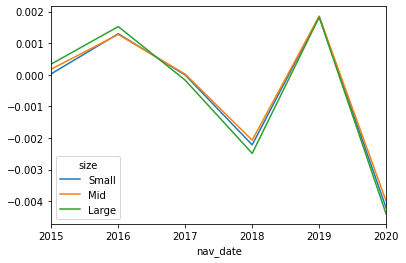

In [88]:
small_cap_monthly.reset_index().groupby(["nav_date","size"])["dret"].agg("mean").unstack().plot()
# y = small_cap_monthly.reset_index()
# y["caldt"] = pd.to_datetime(y["caldt"])
# y = y[y["caldt"] < pd.to_datetime("01-10-2020")]
# y.groupby(["caldt","size"])["dret"].agg("mean").unstack().plot()
# y.unstack().plot()

# Filtering out only Start of month data

In [3]:
small_cap = small_cap[small_cap["nav_date"] == small_cap["caldt"]]

small_cap.head(7)

,crsp_fundno,nav_date,dnav,dret,caldt,nav_latest,fund_name,ticker,dead_flag
20,2727,2015-12-31,15.17,-0.011082,2015-12-31,15.17,GuideStone Funds: Small Cap Equity Fund; Inves...,GSCZX,True
42,2727,2016-12-30,17.56,-0.004535,2016-12-30,17.56,GuideStone Funds: Small Cap Equity Fund; Inves...,GSCZX,True
62,2727,2017-12-29,18.37,-0.007563,2017-12-29,18.37,GuideStone Funds: Small Cap Equity Fund; Inves...,GSCZX,True
84,2727,2018-12-31,13.01,0.010093,2018-12-31,13.01,GuideStone Funds: Small Cap Equity Fund; Inves...,GSCZX,True
105,2727,2019-12-31,15.66,0.002561,2019-12-31,15.66,GuideStone Funds: Small Cap Equity Fund; Inves...,GSCZX,True
125,2727,2020-12-31,18.54,0.000540,2020-12-31,18.54,GuideStone Funds: Small Cap Equity Fund; Inves...,GSCZX,True
146,2745,2015-12-31,11.04,-0.011638,2015-12-31,11.04,ASTON Funds: ASTON/River Road Small Cap Value ...,ARSVX,True
